In [20]:
import pandas as pd

df = pd.read_csv('/content/manufacturing_dataset_1000_samples.csv')

display(df.head())

,Timestamp,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,01-01-2023 00:00,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,Evening,Type_B,Economy,Thursday,1.625,42.3,0.063,0.510,36.5
1,01-01-2023 01:00,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,Night,Type_A,Standard,Wednesday,1.655,48.5,0.037,0.389,29.9
2,01-01-2023 02:00,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,Day,Type_A,Standard,Monday,1.922,29.4,0.061,0.551,56.9
3,01-01-2023 03:00,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,Evening,Type_A,Premium,Saturday,2.215,52.3,0.054,0.293,31.0
4,01-01-2023 04:00,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,Night,Type_B,Premium,Monday,1.691,54.9,0.145,0.443,15.0


## Data understanding

### Subtask:
Inspect the dataset by checking datatypes, summary statistics, and distributions.


In [21]:
df.info()
display(df.describe())
display(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Injection_Temperature       1000 non-null   float64
 2   Injection_Pressure          1000 non-null   float64
 3   Cycle_Time                  1000 non-null   float64
 4   Cooling_Time                1000 non-null   float64
 5   Material_Viscosity          980 non-null    float64
 6   Ambient_Temperature         980 non-null    float64
 7   Machine_Age                 1000 non-null   float64
 8   Operator_Experience         980 non-null    float64
 9   Maintenance_Hours           1000 non-null   int64  
 10  Shift                       1000 non-null   object 
 11  Machine_Type                1000 non-null   object 
 12  Material_Grade              1000 non-null   object 
 13  Day_of_Week                 1000 n

,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
count,1000.000000,1000.000000,1000.00000,1000.00000,980.000000,980.000000,1000.000000,980.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,215.315900,116.075000,35.85170,11.92320,251.630714,22.941224,7.855900,30.795204,50.580000,1.885852,47.737000,0.192688,0.356844,29.298100
std,11.995507,14.667246,8.35349,2.30429,73.348695,2.773712,3.900798,27.684769,16.014558,0.274323,8.671153,0.173839,0.195610,11.955497
min,180.000000,80.000000,16.30000,8.00000,104.600000,18.000000,1.000000,1.000000,26.000000,1.286000,24.600000,0.006000,0.001000,5.000000
25%,207.200000,105.900000,28.80000,10.27500,200.900000,20.800000,4.700000,9.800000,45.000000,1.683750,41.000000,0.061000,0.193000,17.500000
50%,215.300000,115.950000,36.85000,11.90000,242.700000,22.900000,7.900000,22.100000,50.000000,1.849500,48.550000,0.139000,0.355500,28.200000
75%,222.800000,125.925000,45.00000,13.50000,295.300000,25.100000,11.100000,43.425000,55.000000,2.044250,55.300000,0.274000,0.520000,38.000000
max,300.000000,150.000000,60.00000,19.90000,1000.000000,28.000000,15.000000,120.000000,500.000000,2.843000,64.900000,0.840000,0.755000,68.600000


,Timestamp,Shift,Machine_Type,Material_Grade,Day_of_Week
count,1000,1000,1000,1000,1000
unique,1000,3,3,3,7
top,11-02-2023 15:00,Day,Type_A,Standard,Friday
freq,1,517,384,591,168


## Preprocessing

### Subtask:
timestamp- Convert the 'Timestamp' column to datetime objects and extract relevant time-based features. Then, check the head of the dataframe to verify the changes.


In [22]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
df['Hour'] = df['Timestamp'].dt.hour
df['Day_of_Week_Num'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month

display(df.head())

,Timestamp,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,...,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour,Hour,Day_of_Week_Num,Month
0,2023-01-01 00:00:00,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,...,Economy,Thursday,1.625,42.3,0.063,0.510,36.5,0,6,1
1,2023-01-01 01:00:00,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,...,Standard,Wednesday,1.655,48.5,0.037,0.389,29.9,1,6,1
2,2023-01-01 02:00:00,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,...,Standard,Monday,1.922,29.4,0.061,0.551,56.9,2,6,1
3,2023-01-01 03:00:00,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,...,Premium,Saturday,2.215,52.3,0.054,0.293,31.0,3,6,1
4,2023-01-01 04:00:00,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,...,Premium,Monday,1.691,54.9,0.145,0.443,15.0,4,6,1


**Subtask**
The 'Timestamp' column has been successfully converted to datetime objects and relevant time-based features have been extracted. Since the extracted features capture the temporal information needed for the analysis, the original 'Timestamp' column is no longer necessary and can be dropped to avoid redundancy.



In [23]:
df = df.drop('Timestamp', axis=1)
display(df.head())

,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,...,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour,Hour,Day_of_Week_Num,Month
0,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,Evening,...,Economy,Thursday,1.625,42.3,0.063,0.510,36.5,0,6,1
1,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,Night,...,Standard,Wednesday,1.655,48.5,0.037,0.389,29.9,1,6,1
2,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,Day,...,Standard,Monday,1.922,29.4,0.061,0.551,56.9,2,6,1
3,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,Evening,...,Premium,Saturday,2.215,52.3,0.054,0.293,31.0,3,6,1
4,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,Night,...,Premium,Monday,1.691,54.9,0.145,0.443,15.0,4,6,1


## Preprocessing - missing values

### Subtask:
Handle missing values using an appropriate strategy (mean, median, or mode).


In [24]:
# Impute missing values in 'Material_Viscosity' with the mean
df['Material_Viscosity'].fillna(df['Material_Viscosity'].mean(), inplace=True)

# Impute missing values in 'Ambient_Temperature' with the mean
df['Ambient_Temperature'].fillna(df['Ambient_Temperature'].mean(), inplace=True)

# Impute missing values in 'Operator_Experience' with the mean
df['Operator_Experience'].fillna(df['Operator_Experience'].mean(), inplace=True)

# Verify that there are no remaining missing values
display(df.isnull().sum())

/tmp/ipython-input-979453261.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Material_Viscosity'].fillna(df['Material_Viscosity'].mean(), inplace=True)
/tmp/ipython-input-979453261.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

,0
Injection_Temperature,0
Injection_Pressure,0
Cycle_Time,0
Cooling_Time,0
Material_Viscosity,0
Ambient_Temperature,0
Machine_Age,0
Operator_Experience,0
Maintenance_Hours,0
Shift,0


## Preprocessing - categorical encoding

### Subtask:
Encode the categorical variables (Shift, Machine_Type, Material_Grade, Day_of_Week).
Apply one-hot encoding to the specified categorical columns

In [25]:
categorical_cols = ['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Temperature_Pressure_Ratio,...,Machine_Type_Type_B,Machine_Type_Type_C,Material_Grade_Premium,Material_Grade_Standard,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
0,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,1.625,...,True,False,False,False,False,False,False,True,False,False
1,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,1.655,...,False,False,False,True,False,False,False,False,False,True
2,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,1.922,...,False,False,False,True,True,False,False,False,False,False
3,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,2.215,...,False,False,True,False,False,True,False,False,False,False
4,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,1.691,...,True,False,True,False,True,False,False,False,False,False


## Preprocessing - numerical scaling

### Subtask:
Scale the numerical features using a suitable scaler (StandardScaler or MinMaxScaler).


In [26]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('Parts_Per_Hour')

scaler = StandardScaler()

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

display(df_encoded.head())

,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Temperature_Pressure_Ratio,...,Machine_Type_Type_B,Machine_Type_Type_C,Material_Grade_Premium,Material_Grade_Standard,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
0,0.474090,1.359149,-0.856562,0.728050,1.706789,1.843286,-1.040282,-0.715348,0.838407,-0.951369,...,True,False,False,False,False,False,False,True,False,False
1,-0.168139,0.874835,-0.161894,0.901726,-0.493710,-0.124333,-0.270824,-0.894229,0.463560,-0.841954,...,False,False,False,True,False,False,False,False,False,True
2,0.624221,-0.011937,-1.910541,-1.052130,0.762931,0.859476,-0.937688,-0.773758,-0.223658,0.131838,...,False,False,False,True,True,False,False,False,False,False
3,1.499987,-0.734998,0.401027,0.510955,-1.568468,1.114538,0.344743,-0.810265,-0.098710,1.200456,...,False,False,True,False,False,True,False,False,False,False
4,-0.259886,0.642910,1.095695,-0.878454,0.641676,0.240041,-0.424715,-0.284574,-0.098710,-0.710657,...,True,False,True,False,True,False,False,False,False,False


## Exploratory data analysis (eda)

### Subtask:
Perform univariate and bivariate analysis, identify outliers, and visualize feature importance.


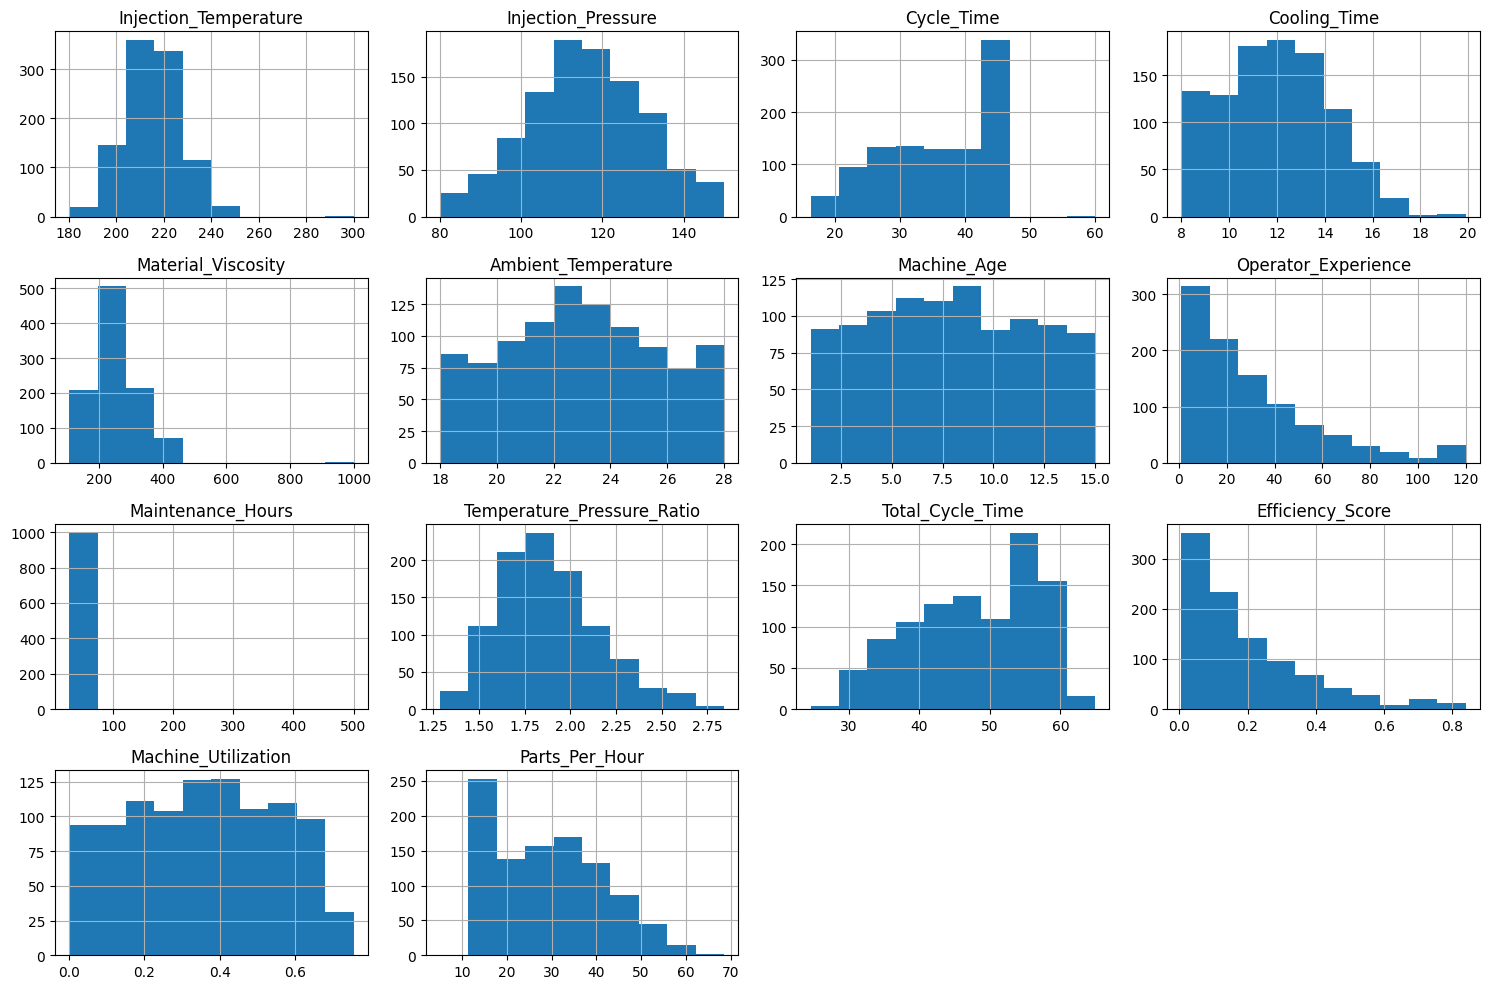

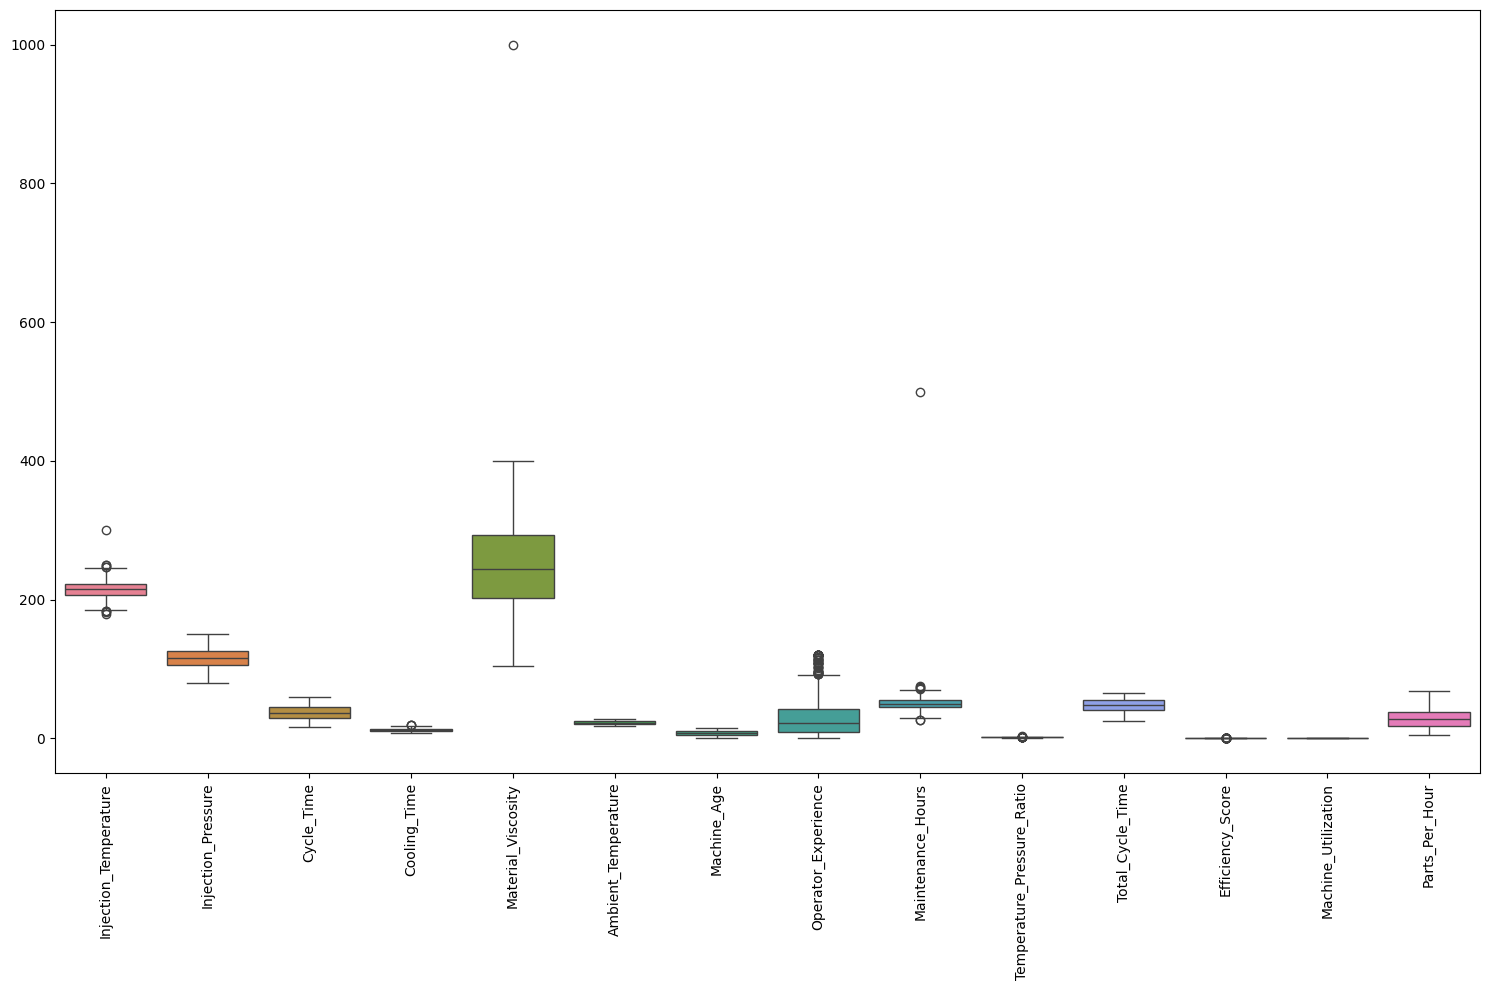

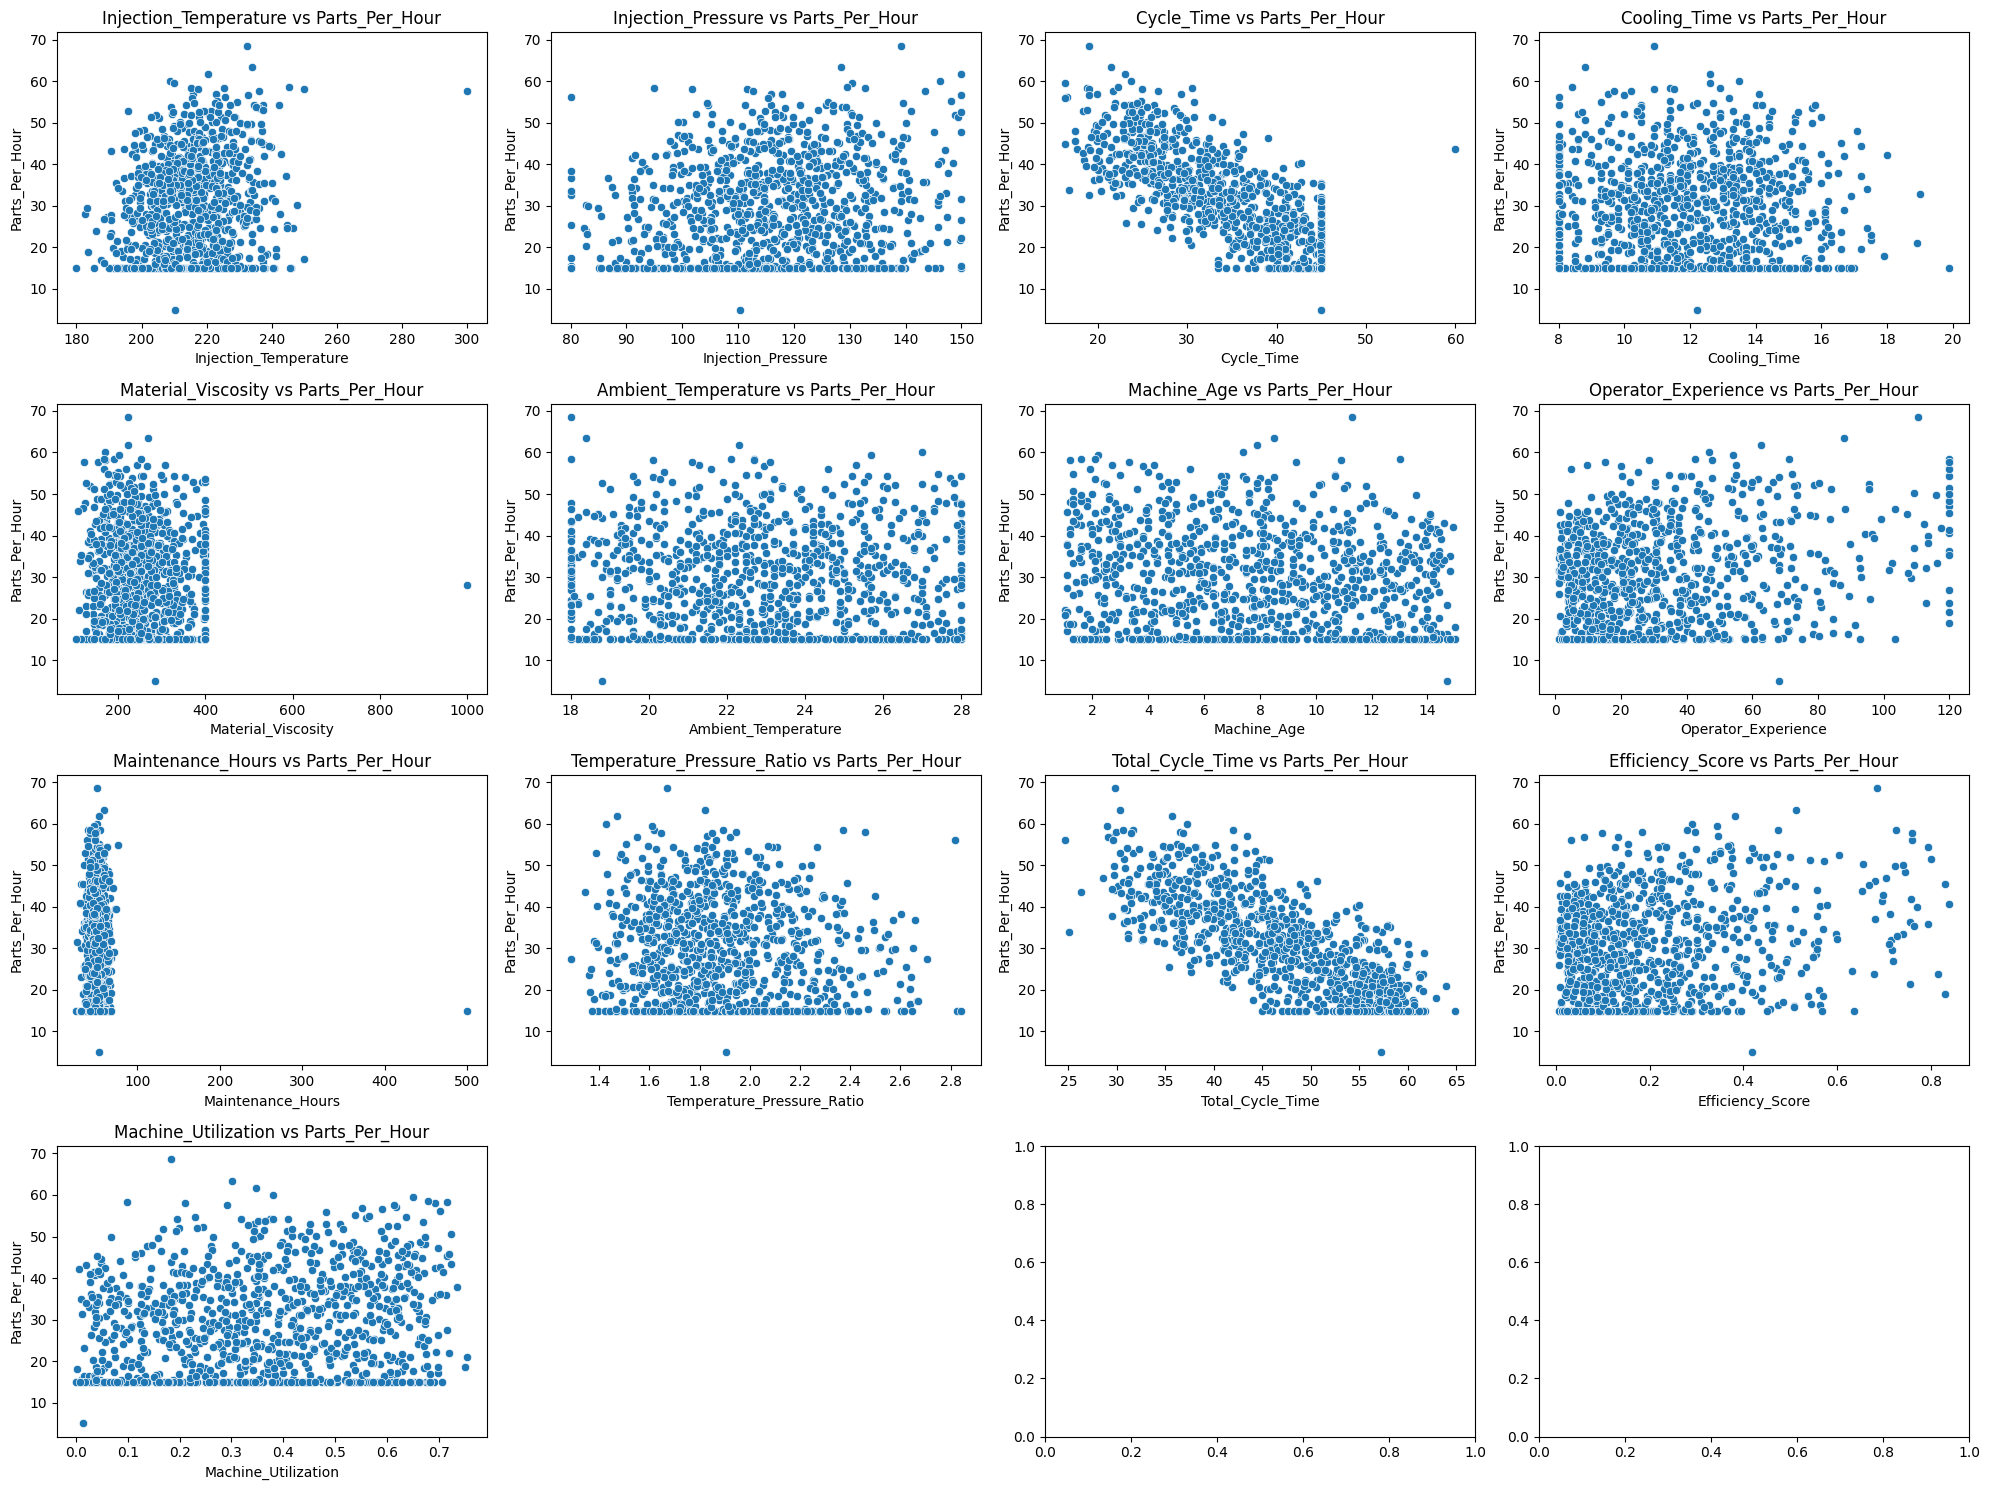

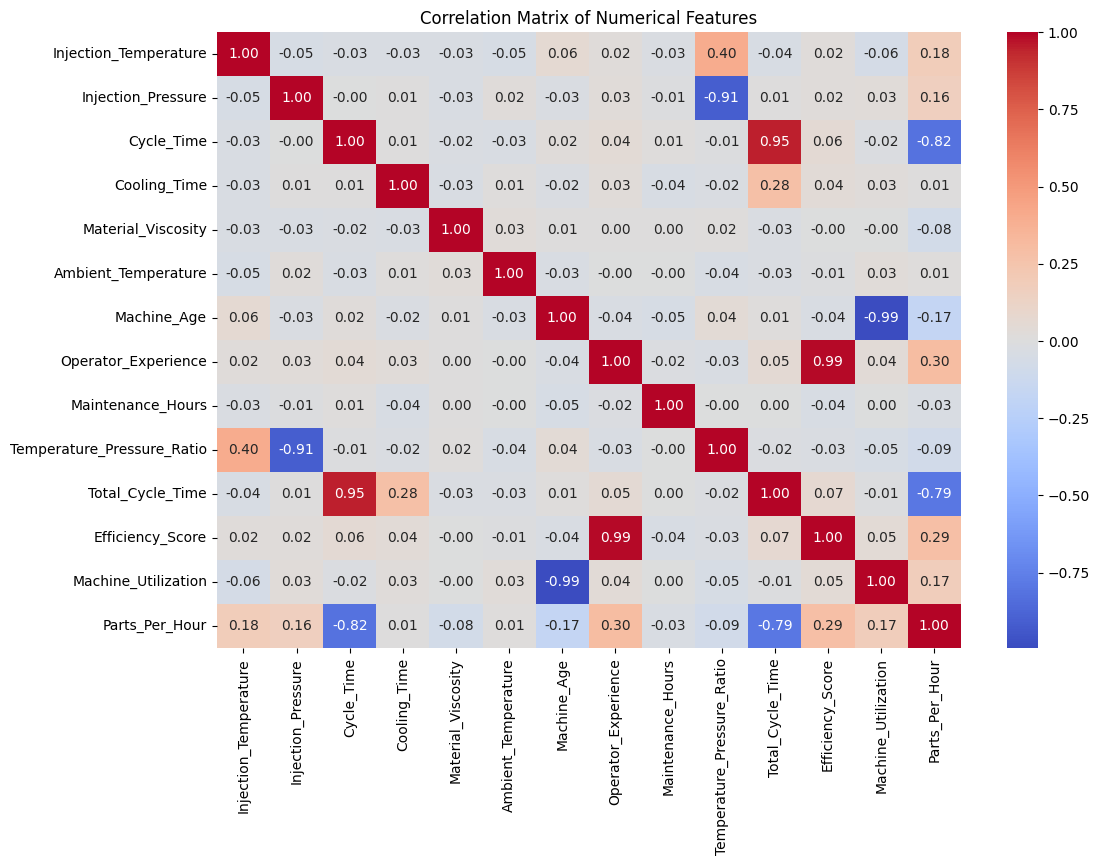

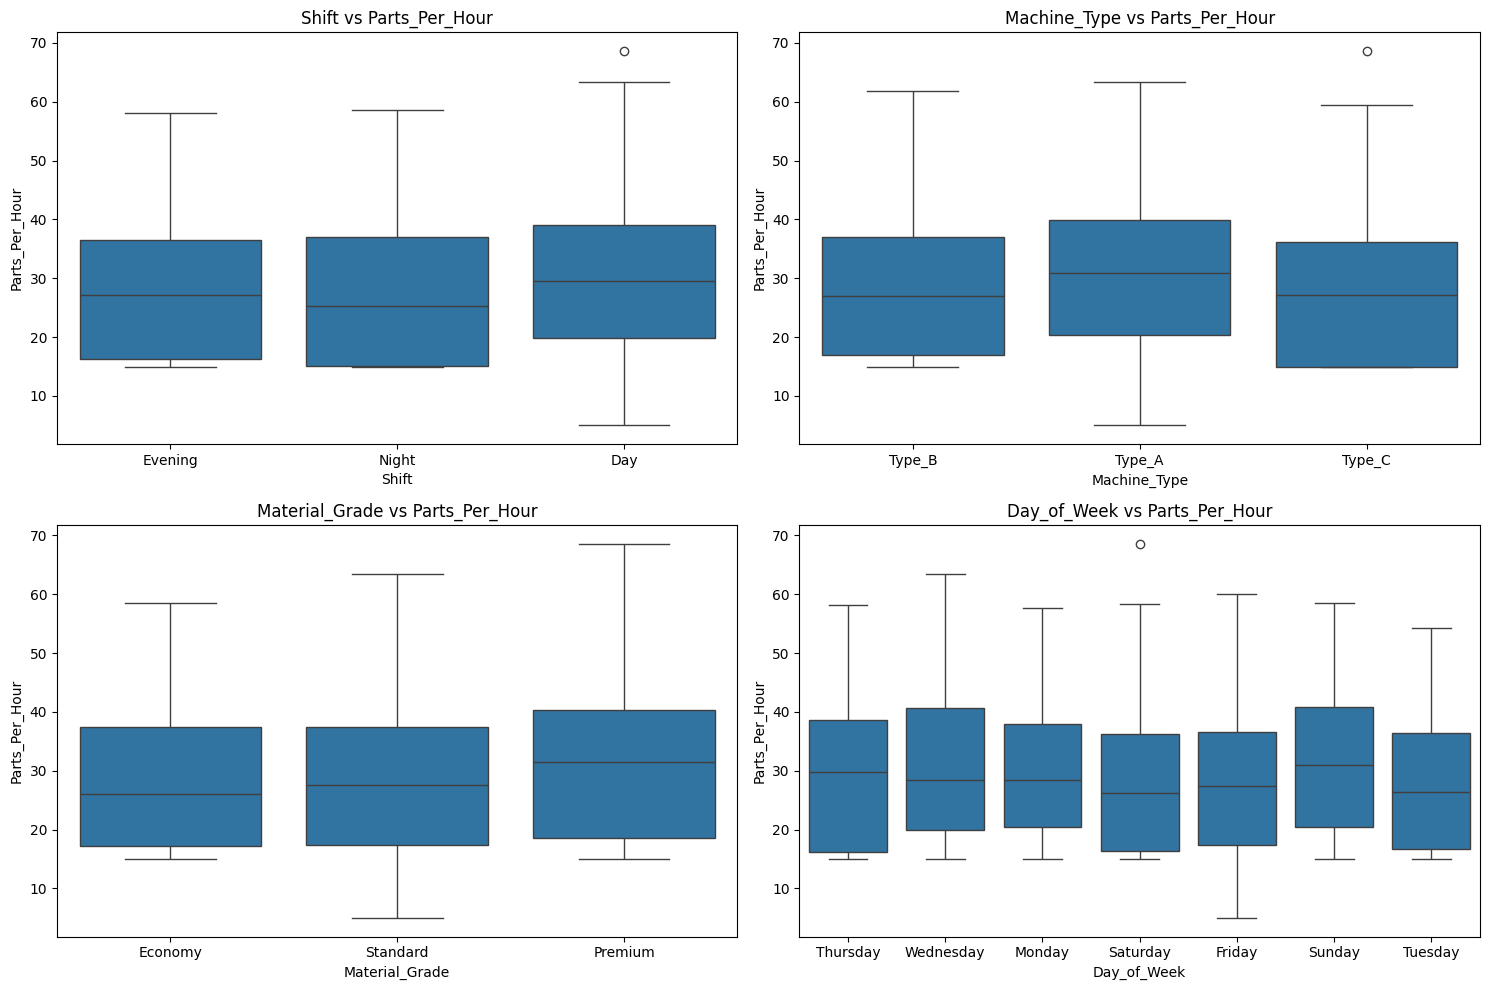

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = ['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week']

# Histograms for numerical features
df[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box plots for numerical features to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Scatter plots against 'Parts_Per_Hour'
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    if col != 'Parts_Per_Hour':
        sns.scatterplot(x=df[col], y=df['Parts_Per_Hour'], ax=axes[i])
        axes[i].set_title(f'{col} vs Parts_Per_Hour')
fig.delaxes(axes[len(numerical_cols)-1]) # Remove the empty subplot for 'Parts_Per_Hour' vs 'Parts_Per_Hour'
plt.tight_layout()
plt.show()


# Correlation matrix and heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Box plots for categorical features vs 'Parts_Per_Hour'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.boxplot(x=df[col], y=df['Parts_Per_Hour'], ax=axes[i])
    axes[i].set_title(f'{col} vs Parts_Per_Hour')
plt.tight_layout()
plt.show()

## Modeling

### Subtask:
Split the data into training and testing sets and build a Linear Regression model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_encoded.drop('Parts_Per_Hour', axis=1)
y = df_encoded['Parts_Per_Hour']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluation

### Subtask:
Evaluate the model using regression metrics (RMSE, MSE, R²).


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Squared Error (MSE): 12.11
Root Mean Squared Error (RMSE): 3.48
R-squared (R²): 0.91


## Summarize results

### Subtask:
Summarize insights and errors from the model evaluation.


In [31]:
print("Model Evaluation Summary:")
print("--------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print("\nInterpretation:")
print(f"- MSE ({mse:.2f}): This is the average of the squared errors. It gives a measure of the average magnitude of the errors. A lower MSE indicates a better fit to the data. The value of {mse:.2f} represents the average squared difference between the predicted and actual 'Parts_Per_Hour' values.")
print(f"- RMSE ({rmse:.2f}): This is the square root of the MSE. It provides an error metric in the same units as the target variable ('Parts_Per_Hour'). An RMSE of {rmse:.2f} means, on average, the model's predictions are off by about {rmse:.2f} parts per hour.")
print(f"- R-squared (R²) ({r2:.2f}): This metric represents the proportion of the variance in the dependent variable ('Parts_Per_Hour') that is predictable from the independent variables. An R² of {r2:.2f} indicates that approximately {r2*100:.2f}% of the variability in 'Parts_Per_Hour' can be explained by the model. A value close to 1 suggests a good fit.")

print("\nInitial Thoughts on Improvement:")
print("The R-squared value of {r2:.2f} suggests that the model explains a high proportion of the variance in 'Parts_Per_Hour', indicating a reasonably good fit. The RMSE of {rmse:.2f} provides a sense of the typical prediction error. While the current performance is good, potential areas for improvement could include exploring non-linear models, feature engineering, or investigating potential outliers that might be influencing the errors.")

Model Evaluation Summary:
--------------------------
Mean Squared Error (MSE): 12.11
Root Mean Squared Error (RMSE): 3.48
R-squared (R²): 0.91

Interpretation:
- MSE (12.11): This is the average of the squared errors. It gives a measure of the average magnitude of the errors. A lower MSE indicates a better fit to the data. The value of 12.11 represents the average squared difference between the predicted and actual 'Parts_Per_Hour' values.
- RMSE (3.48): This is the square root of the MSE. It provides an error metric in the same units as the target variable ('Parts_Per_Hour'). An RMSE of 3.48 means, on average, the model's predictions are off by about 3.48 parts per hour.
- R-squared (R²) (0.91): This metric represents the proportion of the variance in the dependent variable ('Parts_Per_Hour') that is predictable from the independent variables. An R² of 0.91 indicates that approximately 90.72% of the variability in 'Parts_Per_Hour' can be explained by the model. A value close to 1 sugg

## Deployment

### Subtask:
Set up a FastAPI endpoint


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'linear_regression_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")
